## SWE Analysis over Sierra Nevada Range using four models for a given day

SWE: Snow Water Equivalence

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
from pandas import Series

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes

### Loading Datasets

In [3]:
# SWE wrf datasets
ds_wrf_1980 = xr.open_dataset('./data/large_files/DOE_VIC.narr_wrf.daily.swe.1980-2012.nc')
ds_wrf_2091 = xr.open_dataset('./data/large_files/DOE_VIC.narr_wrf.daily.swe.2091-2100.nc')

# SWE loca_wrf
ds_loca_wrf_1980 = xr.open_dataset('./data/large_files/DOE_VIC.narr_LOCA_wrf.daily.swe.1980-2012.nc')
ds_loca_wrf_2091 = xr.open_dataset('./data/large_files/DOE_VIC.narr_LOCA_wrf.daily.swe.2091-2100.nc')

# SWE _loca_14
ds_loca_14_1980 = xr.open_dataset('./data/large_files/DOE_VIC.narr_LOCA_L14.daily.swe.1980-2012.nc')
ds_loca_14_2091 = xr.open_dataset('./data/large_files/DOE_VIC.narr_LOCA_L14.daily.swe.2091-2100.nc')

# SWE _bcsd_L14
ds_bcsd_L14_1980 = xr.open_dataset('./data/large_files/DOE_VIC.narr_BCSD_L14.daily.swe.1980-2012.nc')
ds_bcsd_L14_2091 = xr.open_dataset('./data/large_files/DOE_VIC.narr_BCSD_L14.daily.swe.2091-2100.nc')

In [4]:
ds_wrf_1980

<xarray.Dataset>
Dimensions:         (latitude: 128, longitude: 112, nb2: 2, time: 12054)
Coordinates:
  * longitude       (longitude) float32 -123.96875 -123.90625 -123.84375 ...
  * latitude        (latitude) float32 35.03125 35.09375 35.15625 35.21875 ...
  * time            (time) datetime64[ns] 1980-01-01 1980-01-02 1980-01-03 ...
Dimensions without coordinates: nb2
Data variables:
    longitude_bnds  (longitude, nb2) float32 ...
    latitude_bnds   (latitude, nb2) float32 ...
    swe             (time, latitude, longitude) float32 ...
Attributes:
    CDI:                Climate Data Interface version 1.6.1 (http://code.zma...
    Conventions:        GDT 1.2
    history:            Fri Jan 19 21:18:52 2018: cdo -O mergetime /data5/ema...
    institution:        DOE, Santa Clara University
    file_name:          DOE_VIC.narr_wrf.daily.swe.1980.nc
    History:            Archived 2017
    authors:            Maurer, E., SCU
    description:        Daily VIC Output
    creation_date

In [73]:
swe_wrf_1991 = ds_wrf_1980['swe'].sel(time=slice('1991-04-01', '2000-12-31'))
swe_loca_wrf_1991 = ds_loca_wrf_1980['swe'].sel(time=slice('1991-04-01', '2000-12-31'))
swe_loca_14_1991 = ds_bcsd_L14_1980['swe'].sel(time=slice('1991-04-01', '2000-12-31'))
swe_bcsd_L14_1991 = ds_bcsd_L14_1980['swe'].sel(time=slice('1991-01-01', '2000-12-31'))

### Setting up the date range

In [81]:
# Creating a pandas datetime range to collect data every year on April 1st
# resource: https://stackoverflow.com/questions/32168848/how-to-create-a-pandas-datetimeindex-with-year-as-frequency

past_range = pd.date_range('1991-04-01', periods=10, freq=pd.DateOffset(years=1))
future_range = pd.date_range('2091-04-01', periods=10, freq=pd.DateOffset(years=1))
cbar_range = set()
def add_to_cbar(ds, var_str):
    get_df = ds.to_dataframe()
    cbar_range.add(get_df[var_str].min())
    cbar_range.add(get_df[var_str].max())

### Mean difference of narr_wrf

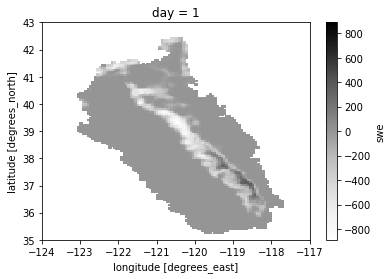

In [82]:
combined_swe_wrf_past = xr.concat([i for i in [swe_wrf_1991.sel(time=date) for date in past_range]], 'time')
combined_swe_wrf_future = xr.concat([i for i in [ds_wrf_2091['swe'].sel(time=date) for date in future_range]], 'time')

wrf_res = (combined_scf_wrf_future.groupby('time.day').median('time') - combined_scf_wrf_past.groupby('time.day').median('time'))
wrf_res.plot(cmap='Greys')
add_to_cbar(wrf_res, 'swe')


### Mean difference of narr_loca_wrf

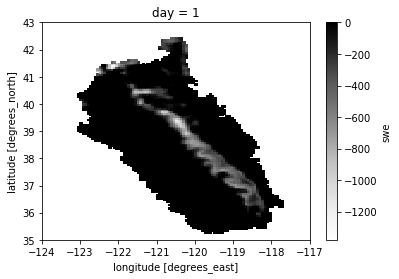

In [83]:
combined_swe_loca_wrf_past = xr.concat([i for i in [swe_loca_wrf_1991.sel(time=date) for date in past_range]], 'time')
combined_swe_loca_wrf_future = xr.concat([i for i in [ds_loca_wrf_2091['swe'].sel(time=date) for date in future_range]], 'time')


loca_wrf_res = (combined_swe_loca_wrf_future.groupby('time.day').median('time') - combined_swe_loca_wrf_past.groupby('time.day').median('time'))
loca_wrf_res.plot(cmap='Greys')
add_to_cbar(loca_wrf_res, 'swe')


### Mean difference of narr_loca_14

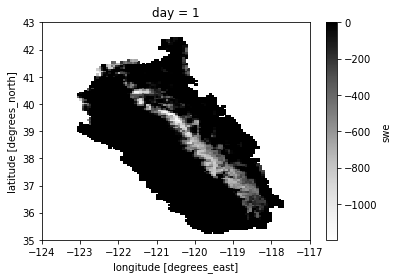

In [84]:
combined_swe_loca_14_past = xr.concat([i for i in [swe_loca_14_1991.sel(time=date) for date in past_range]], 'time')
combined_swe_loca_14_future = xr.concat([i for i in [ds_loca_14_2091['swe'].sel(time=date) for date in future_range]], 'time')

loca_14_res = (combined_swe_loca_14_future.groupby('time.day').median('time') - combined_swe_loca_14_past.groupby('time.day').median('time'))
loca_14_res.plot(cmap='Greys')

add_to_cbar(loca_14_res, 'swe')

### Mean difference of narr_bcsd_14

In [78]:
combined_swe_bcsd_L14_past = xr.concat([i for i in [swe_bcsd_L14_1991.sel(time=date) for date in past_range]], 'time')
combined_swe_bcsd_L14_future = xr.concat([i for i in [ds_bcsd_L14_2091['swe'].sel(time=date) for date in future_range]], 'time')



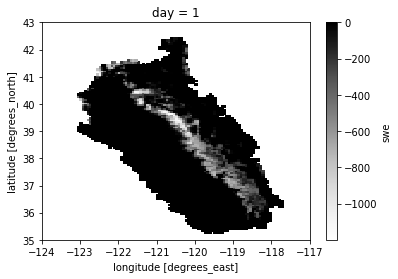

In [85]:
bcsd_res = (combined_swe_bcsd_L14_future.groupby('time.day').median('time') - combined_swe_bcsd_L14_past.groupby('time.day').median('time'))
bcsd_res.plot(cmap='Greys')

add_to_cbar(bcsd_res, 'swe')

In [86]:
cbar_range

{-1379.1486, -1199.9015, -1199.125, -889.144, 0.0, 398.08356}

## Multi-plots

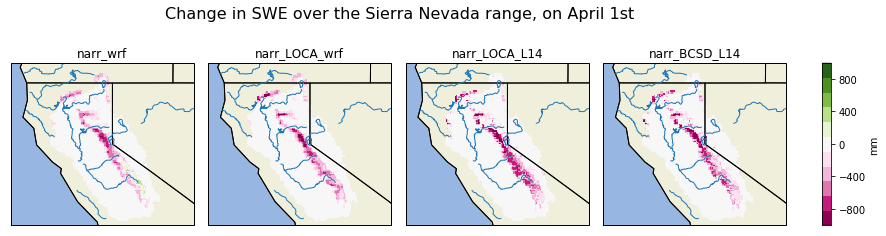

In [87]:



mean_list = [wrf_res, loca_wrf_res, loca_14_res, bcsd_res]

# Configuration for the map
projection = ccrs.PlateCarree()
axes_class = (GeoAxes, dict(map_projection=projection))
fig = plt.figure(figsize=(15, 15))
axgr = AxesGrid(fig, 
                111, 
                axes_class=axes_class,
                nrows_ncols=(1, 4),
                axes_pad=0.2,
                share_all=True,
                label_mode="",
                cbar_location="right",
                cbar_mode="single",
                cbar_pad=0.5
               )
cbar_label_title = 'mm'


for i, ax in enumerate(axgr):
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES)
    ax.add_feature(cfeature.LAND)    
    ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='none', edgecolor='tab:blue')
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='tab:blue')   
    # setting the location t
    ax.set_extent([-125, -116, 43, 35])
    #contourf = mean_list[i].plot.contourf(x='longitude', y='latitude', cmap="Greys")
    djf_plt = mean_list[i].plot(ax=axgr[i], transform=ccrs.PlateCarree(), x='longitude', y='latitude', cmap=plt.get_cmap('PiYG', 11), add_colorbar=False)
    #djf_plt.set_clim(min(cbar_range), max(cbar_range))
    djf_plt.set_clim(-1000, 1000)
    

axgr[0].set_title('narr_wrf')
axgr[1].set_title('narr_LOCA_wrf')
axgr[2].set_title('narr_LOCA_L14')
axgr[3].set_title('narr_BCSD_L14')

fig.subplots_adjust(left=0.14, top=1.64)
fig.suptitle('Change in SWE over the Sierra Nevada range, on April 1st', fontsize=16, y=1.01)
cb = axgr.cbar_axes[0].colorbar(djf_plt)
#axgr.cba
cb.set_label_text(cbar_label_title)       # color bar title not needed for SCF since it is a fraction